# Problem #2: Pre-processing and Normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

### Loading the Data

In [2]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [3]:
print(np.shape(data))
print(np.shape(labels))

(28844, 100, 100, 3)
(28844,)


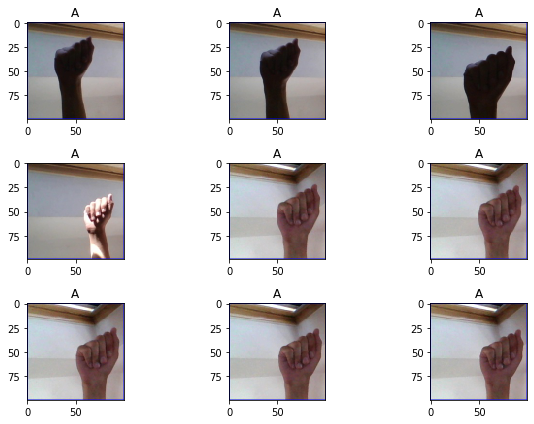

In [4]:
fig = plt.figure(figsize=(9,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(data[i,:,:])
    plt.title(labels[i])
plt.tight_layout()
plt.show()

### Greyscale transformation

The advantage of converting the images to greyscale is that color will be removed.  This is advantageuos because the ASL letters only depend on form/shape; color is not a factor in determining a letter.  It will remove any differences between images of the same letter due to color of skin, clothes, or background.  Therefore, removing the color will allow an ML algorithm to converge faster because it will not try to use color as an indicator of letter.  Additionally, it reduces the dimensionality of the data because it combines all the color channels.

One disadvantage of converting the images to greyscale is that the size of file gets significanly larger due to the array having floats now instead of all integers.

In [5]:
greyscale_data = rgb2gray(data)

In [7]:
print(np.shape(greyscale_data))
print(greyscale_data.dtype)

(28844, 100, 100)
float64


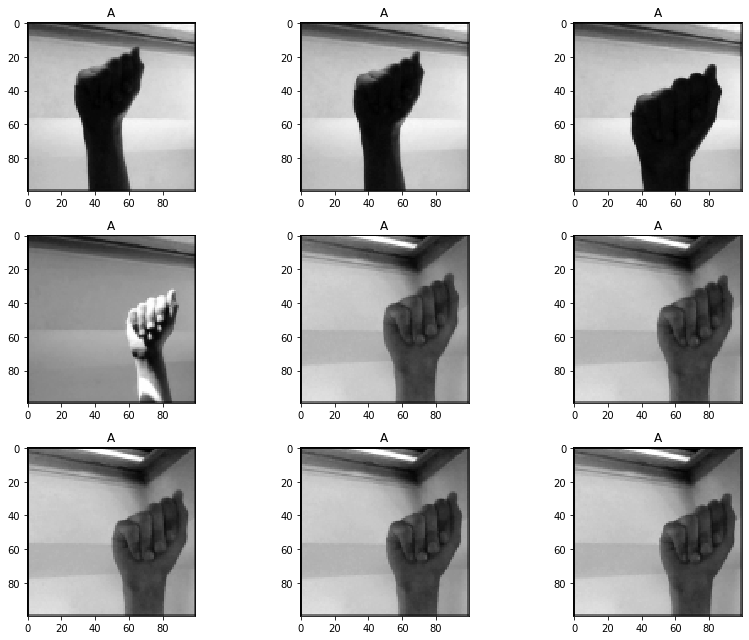

In [8]:
fig = plt.figure(figsize=(12,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(greyscale_data[i,:,:], cmap=plt.cm.gray)
    plt.title(labels[i])
plt.tight_layout()
plt.show()

### Normaliztion transformation

The advantage of normalization is that all the color channels are now on a scale of zero to one. Therefore, if you use the normalized data to train a neural network, it will train much faster using the float values instead of the integers in the raw data. Additionally, it can help remove distortions caused by lights and shadows.

One disadvantage of normalizing the images is that the size of file gets significanly larger due to the array having floats now instead of all integers.

In [9]:
norm_data = np.empty_like(data).astype('float')

In [10]:
for i in range(np.shape(norm_data)[0]):
    norm_data[i,:,:,:] = data[i,:,:,:].astype("float") / 255.0

In [11]:
print(np.shape(norm_data))
print(norm_data.dtype)

(28844, 100, 100, 3)


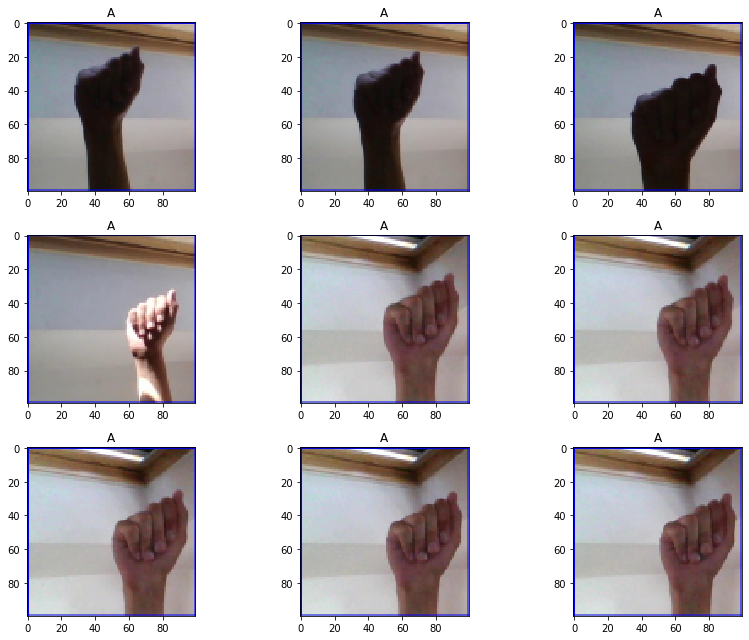

In [13]:
fig = plt.figure(figsize=(12,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(norm_data[i,:,:,:])
    plt.title(labels[i])
plt.tight_layout()
plt.show()

### Conclusion

In conclusion, greyscale transformation is advantageous because it doesn't let the ML algorithm try to use color as an indicator of the letter, reduces the dimensionality of the data, and makes images of the same letter more similiar by removing differing color skins, clothes, and backgrounds.  Min-Max normalizing the data is useful because it makes all the color channels be in the range of zero to one letting neural networks train faster, and it reduces the effect of shadows and lights.

One disadvatange for both normalization techniques is that the file size gets significantly larger.